In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import numpy as np
import seaborn as sns
import pandas as pd
df=pd.read_csv("Dataset/WorldEnergy.csv")

c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2022-07-31,6.921426,0.718109,1.132400,8.771935,1.907862,2.294320,-0.386458,0.199327,6.736891,0.718109,1.111161,8.584805
595,2022-08-31,7.047525,0.718526,1.044026,8.810077,1.821828,2.327090,-0.505262,0.225628,6.755154,0.718526,1.036589,8.530444
596,2022-09-30,6.915201,0.664673,0.978647,8.558521,1.702048,2.219831,-0.517784,-0.257997,6.144280,0.664673,0.960694,7.782741
597,2022-10-31,7.126618,0.614741,1.019209,8.760568,1.767733,2.322475,-0.554743,-0.394651,6.179721,0.614741,1.006859,7.811175


Exploratory Data Analysis


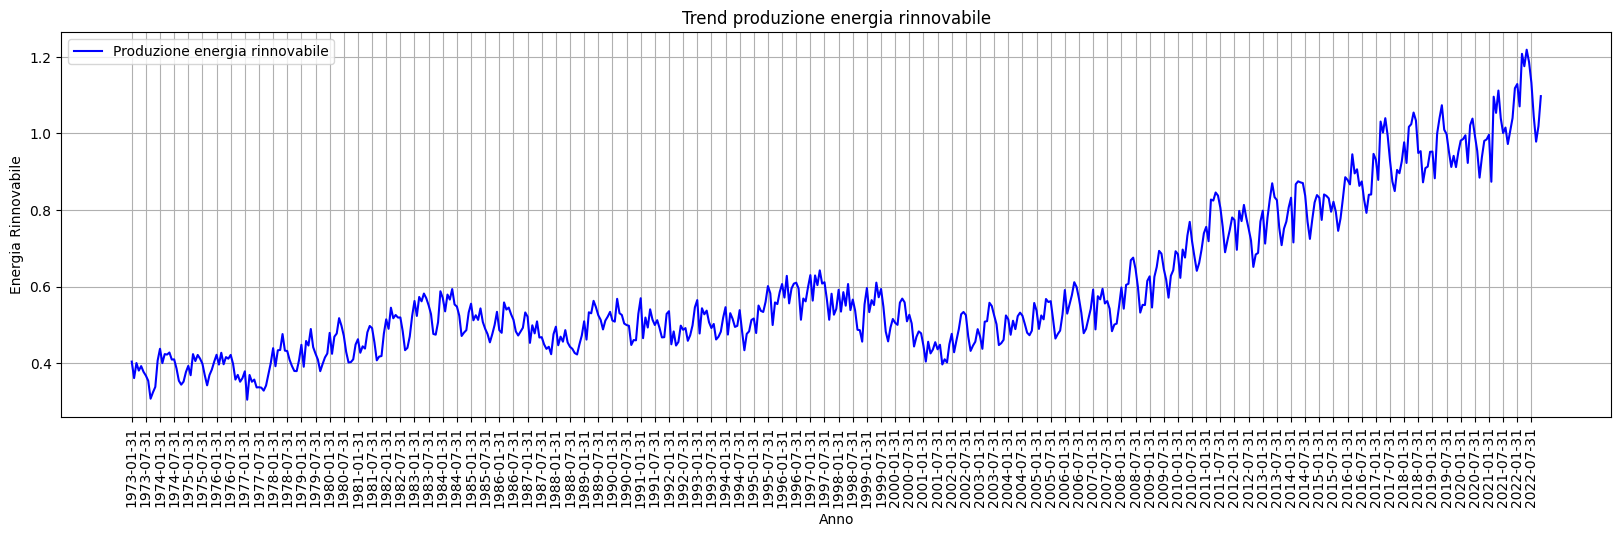

In [4]:

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Total Renewable Energy Production'], linestyle='-', color='b', label='Produzione energia rinnovabile')
plt.xlabel('Anno')
plt.ylabel('Energia Rinnovabile')
plt.title('Trend produzione energia rinnovabile')
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.grid()
plt.show()


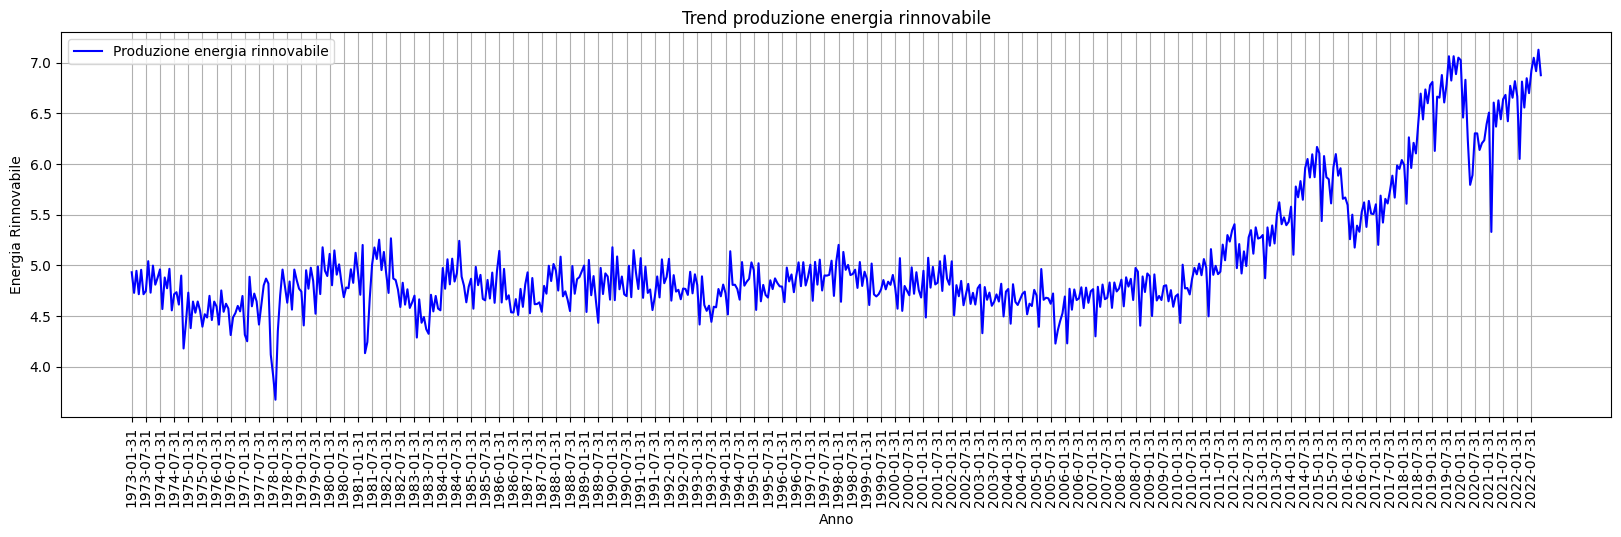

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Total Fossil Fuels Production'], linestyle='-', color='b', label='Produzione energia rinnovabile')
plt.xlabel('Anno')
plt.ylabel('Energia Rinnovabile')
plt.title('Trend produzione energia rinnovabile')
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.grid()
plt.show()

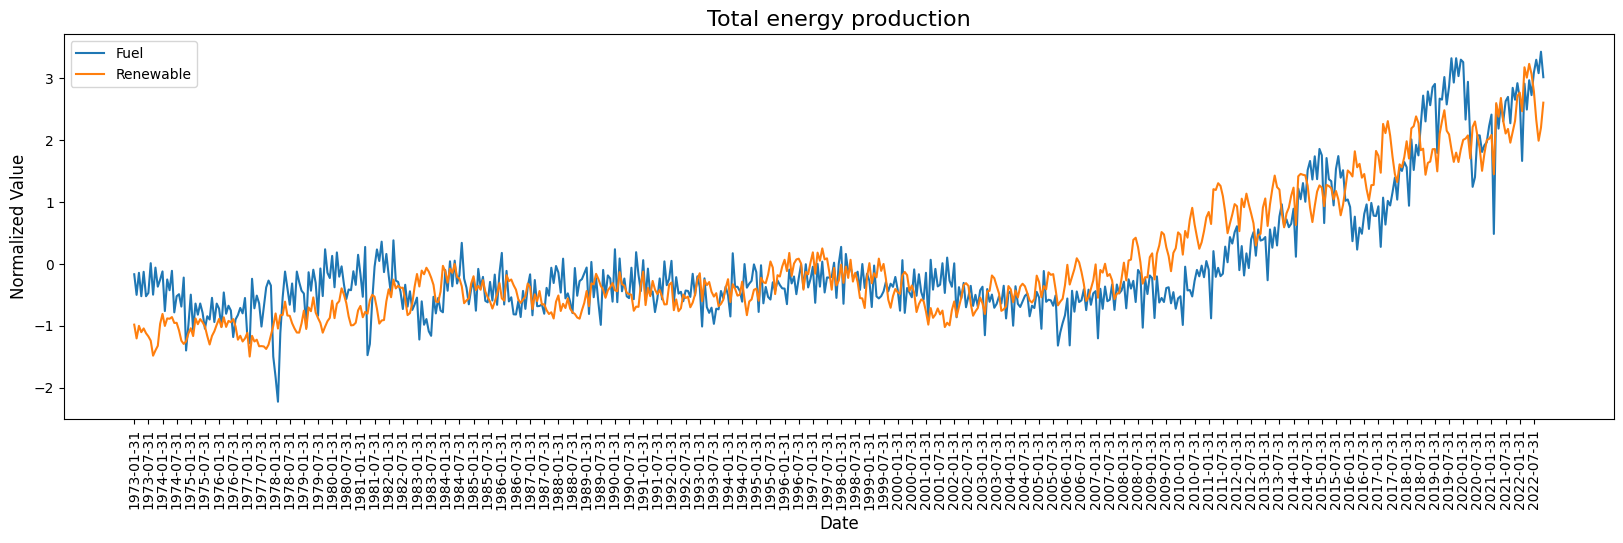

In [23]:
scaler=StandardScaler()
df['Normalized Fuel'] = scaler.fit_transform(df[['Total Fossil Fuels Production']])
df['Normalized Renewable'] = scaler.fit_transform(df[['Total Renewable Energy Production']])

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Normalized Fuel'], label="Fuel")
plt.plot(df['Date'], df['Normalized Renewable'], label="Renewable")
plt.title("Total energy production", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.show()

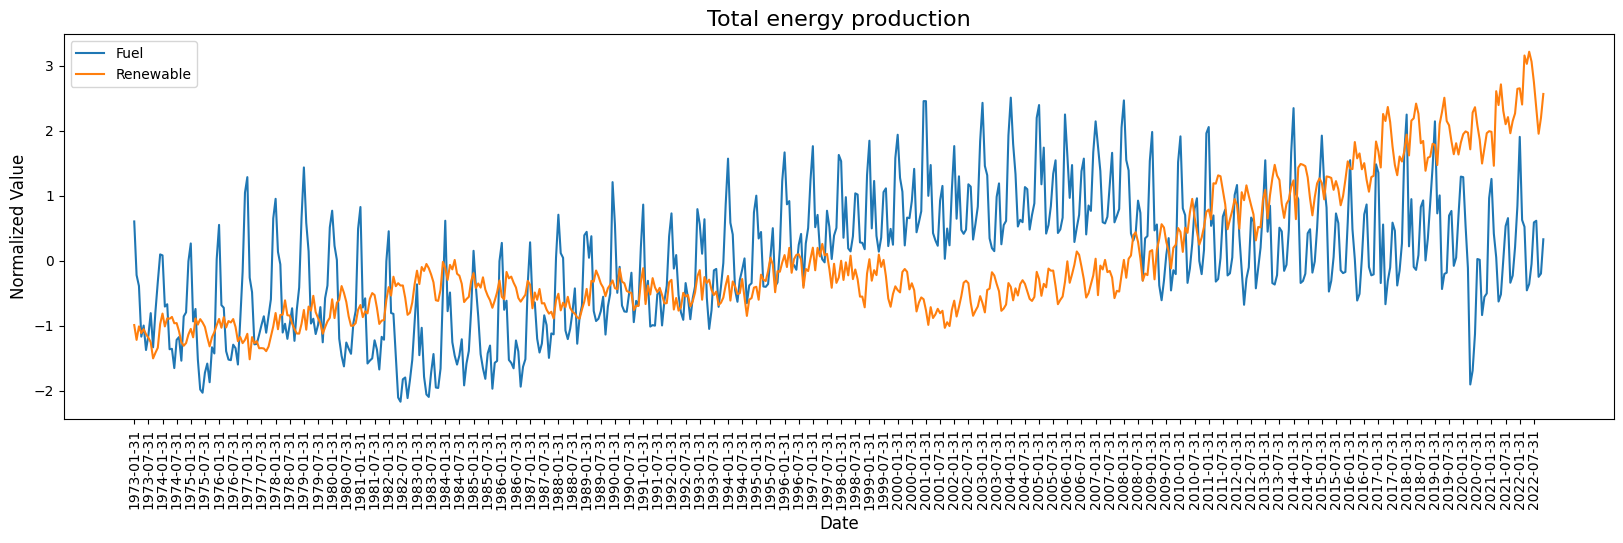

In [24]:
scaler=StandardScaler()
df['Normalized Fuel'] = scaler.fit_transform(df[['Total Fossil Fuels Consumption']])
df['Normalized Renewable'] = scaler.fit_transform(df[['Total Renewable Energy Consumption']])

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Normalized Fuel'], label="Fuel")
plt.plot(df['Date'], df['Normalized Renewable'], label="Renewable")
plt.title("Total energy production", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.show()

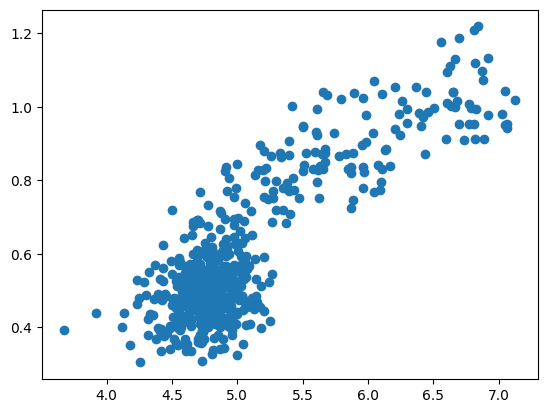

In [9]:
plt.scatter(df['Total Fossil Fuels Production'], df['Total Renewable Energy Production'])


In [10]:
correlation = df['Total Fossil Fuels Production'].corr(df['Total Renewable Energy Production'], method='pearson')

print(f"Coefficiente di correlazione di Pearson: {correlation:.3f}")


Coefficiente di correlazione di Pearson: 0.851


In [20]:
df["% Renewable"]= df['Total Renewable Energy Production']/df['Total Primary Energy Production']*100

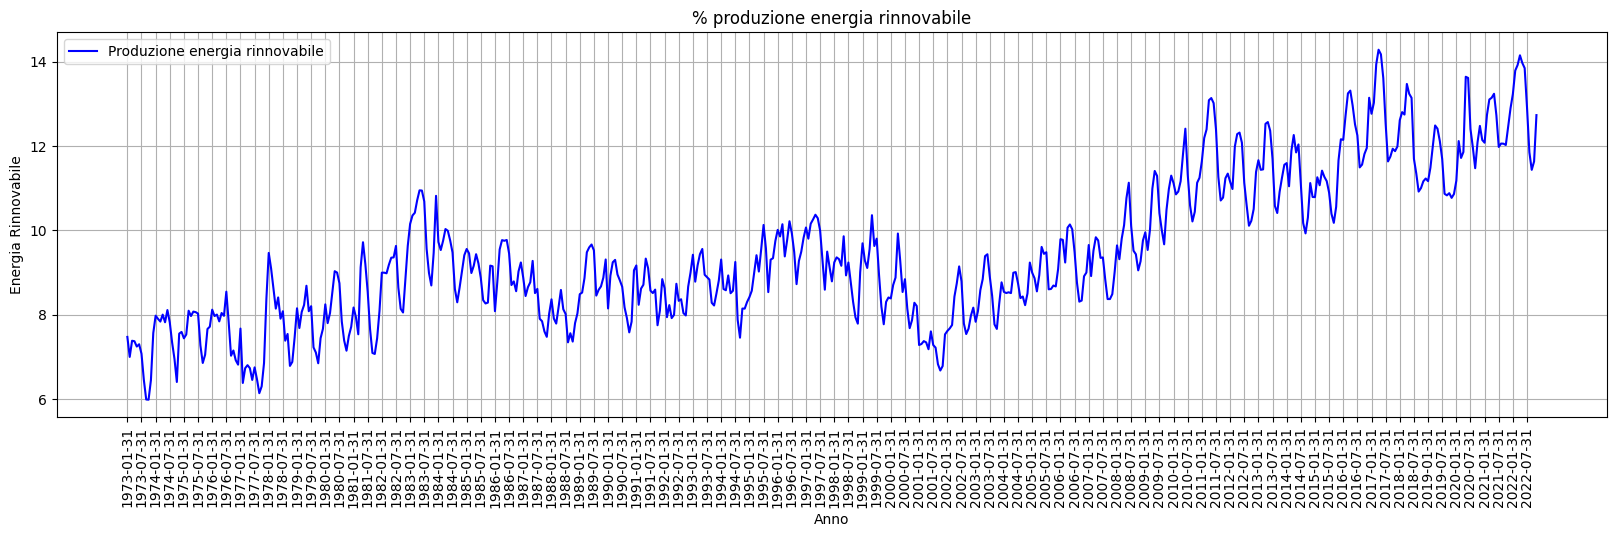

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['% Renewable'], linestyle='-', color='b', label='Produzione energia rinnovabile')
plt.xlabel('Anno')
plt.ylabel('Energia Rinnovabile')
plt.title('% produzione energia rinnovabile')
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.grid()
plt.show()

Machine Learning and Statistics

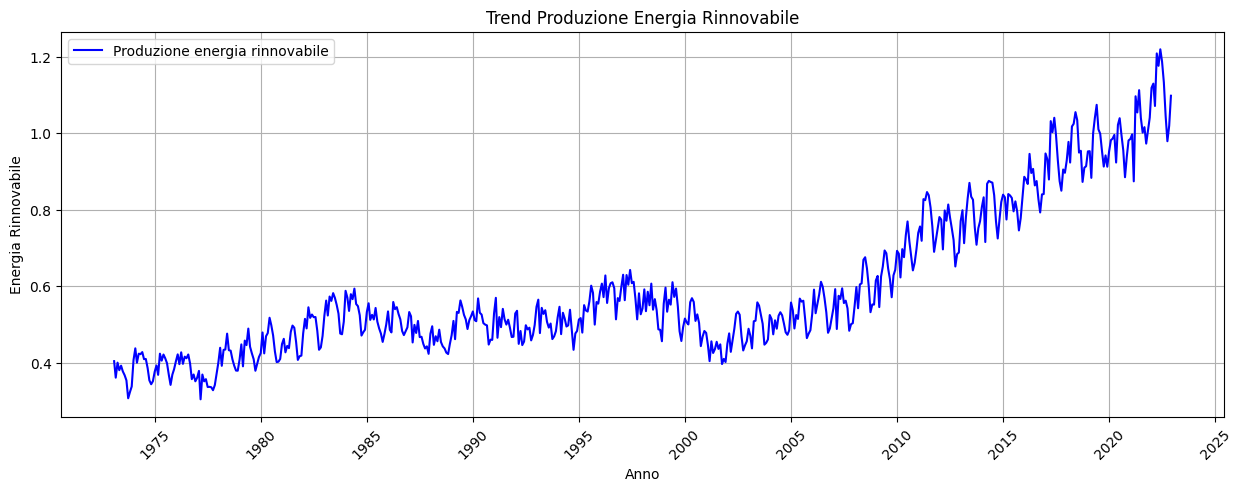

17:53:56 - cmdstanpy - INFO - Chain [1] start processing
17:53:56 - cmdstanpy - INFO - Chain [1] done processing


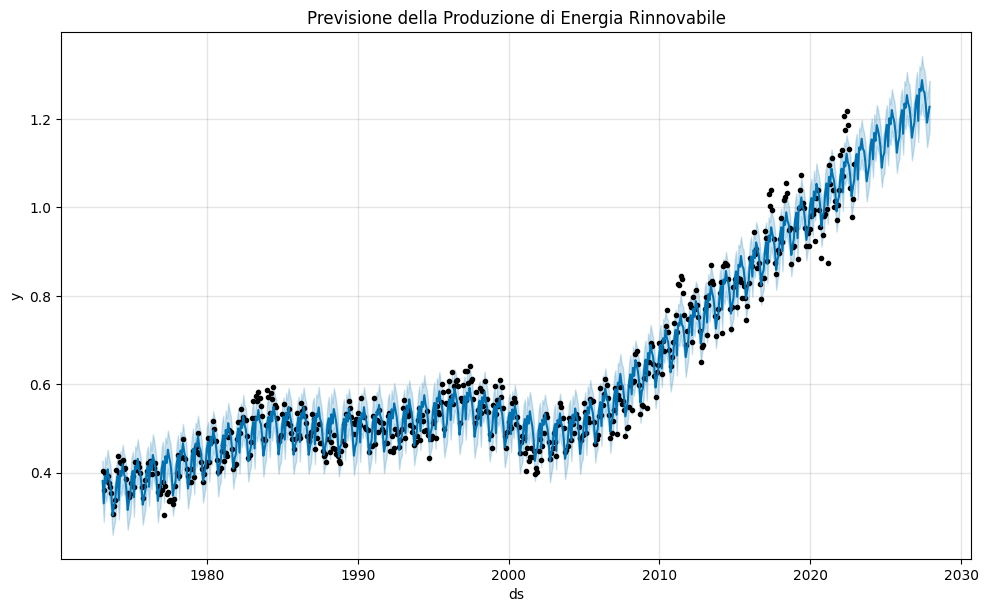

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Converti in datetime
df = df[['Date', 'Total Renewable Energy Production']].rename(columns={'Date': 'ds', 'Total Renewable Energy Production': 'y'})  # Formatta per Prophet

# --- 2. VISUALIZZAZIONE DEL TREND ---
plt.figure(figsize=(15, 5))
plt.plot(df['ds'], df['y'], linestyle='-', color='b', label='Produzione energia rinnovabile')

# Formattazione asse X (una data ogni 5 anni)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anno')
plt.ylabel('Energia Rinnovabile')
plt.title('Trend Produzione Energia Rinnovabile')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# --- 3. MODELLAZIONE E PREVISIONE CON PROPHET ---
model = Prophet()
model.fit(df)

# Creazione delle date future (5 anni in avanti)
future = model.make_future_dataframe(periods=60, freq='ME')  # 60 mesi
forecast = model.predict(future)

# --- 4. VISUALIZZAZIONE DELLE PREVISIONI ---
model.plot(forecast)
plt.title("Previsione della Produzione di Energia Rinnovabile")
plt.show()

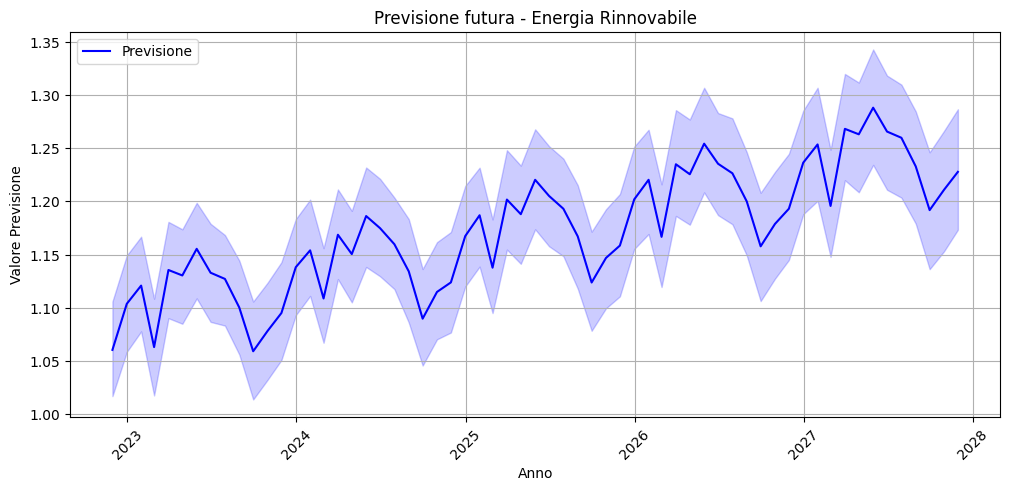

In [ ]:
# Filtra solo le date future
future_forecast = forecast[forecast['ds'] >= df['ds'].max()]

# Creazione del grafico della previsione
plt.figure(figsize=(12, 5))
plt.plot(future_forecast['ds'], future_forecast['yhat'], color='b', label='Previsione')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color='blue', alpha=0.2)

# Formattazione del grafico
plt.xlabel('Anno')
plt.ylabel('Valore Previsione')
plt.title('Previsione futura - Energia Rinnovabile')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()